# 신경망 구현
1. 초기화 (입력,은닉, 출력 노드의 수 정의)_
2. 학습 (가중치 업데이트)
3. 질의 (입력 -> 연산 -> 출력노드에 전달)

In [12]:
import numpy as np
import scipy.special

In [13]:
np.array([1,2,3])
np.array([1,2,3.0])
np.array([[1,2],[3,4]])
np.array([1,2,3], ndmin=2).T

array([[1],
       [2],
       [3]])

In [14]:
class neuralNetwork :
    # 신경망 초기화 기능
    def __init__(self,input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        
        # 가중치는 행렬로 표현
        # 입력/은닉 가중치 행렬 형식 : (은닉노드 * 입력노드)
        # 은닉/출력 가중치 행렬 형식 : (출력노드 * 은닉노드)
        
        # 입력, 은닉 계층 사이의 가중치 행렬
        #                           평균        표준편차                      사이즈
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 활성화 함수 구현 (sigmoid)
        self.activation_function = lambda x : scipy.special.expit(x)
        pass
    
    # 신경망 학습 기능 ( 2단계로 구성 )
    # 1단계 (순전파) : 입력 데이터에 대해 계산(query함수 이용)
    # 2단계 (역전파) : 예측값과 실제값의 차이를 계산 -> 가중치 업데이트
    def train(self, inputs_list, targets_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
         # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 출력계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 오차 = 실제값 -예측값
        output_errors = targets - final_outputs
        
        # 은닉 계층 노드에 대한 역전파된 오차
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합하여 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트 (who)
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # 은닉계층과 출력계층 간의 가중치 업데이트 (who)
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        
        # 입력 계층 노드에 대한 역적파된 오차
        input_errors = np.dot(self.wih.T, hidden_errors)
        pass
    
    # 신경망 질의 기능 : 신경망으로 들어오는 입력을 받아 출력을 반환해주는 기능
    def query(self, iputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = np.array(iputs_list, ndmin = 2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 출력계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [15]:
# 입력, 은닉, 출력 노드 수
input_nodes  = 3
hidden_nodes = 3
output_nodes = 3

# 합습률 정의 (0.1 ~ 0.001)
learning_rate = 0.3

# 신경망 클래스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [16]:
inputs_list = n.query([1.0, 0.5, -1.5])
inputs_list

array([[0.74806179],
       [0.35986904],
       [0.61067769]])

In [17]:
# 0~1 사이의 난수 발생
# np.random.rand(3,3) -0.5

# 정규분포를 따르는 난수 발생
np.random.normal()

-0.13831275105321608

In [18]:
import matplotlib.pyplot as plt

In [19]:
data_file = open('data/mnist/mnist_train_100.csv','r')
data_list = data_file.readlines()
len(data_list)  # 100
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

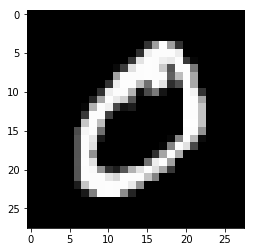

In [20]:
all_values = data_list[1].split(',')
type(all_values)  # list
len(all_values)  # 785

# 0번째를 제거
all_values[1:]

# 문자로 된 숫자 -> 실수로 변환
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap = 'gray', interpolation='None')

In [21]:
# 0 ~ 255 -> 0.01 ~ 1.0  // 0은 데이터가 전달되지 않기 때문에
scale_input = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01

In [22]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [23]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784  # wih 78400
hidden_nodes = 100 # who 1000
output_nodes = 10  # 0~9
# 학습률 0.3
learning_rate = 0.3

# 신경망 객체 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 트레이닝 데이터 불러오기
training_data_file = open('data/mnist/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# mnist 테스트 데이터 불러오기
test_data_file = open('data/mnist/mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

epochs = 8
for e in range(epochs):
    # 신경망 학습
    for record in training_data_list:
        all_values = record.split(',')
        # 0.01 ~ 1 로 스케일링
        inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01

        # 결과값 생성
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99

        n.train(inputs, targets)

In [24]:
# 신경망 테스트

scorecard = []

for record in test_data_list :
    all_values = record.split(',')
    
    # 정답
    correct_label = int(all_values[0])
    print(correct_label,'correct_label')
    outputs = n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
    label = np.argmax(outputs)
    print(label, ": my neywork's answer")
    print('\n')
    if (label == correct_label) :
        scorecard.append(1)
    else :
        scorecard.append(0)
scorecard_array = np.asarray(scorecard)
scorecard_array.sum() / scorecard_array.size

7 correct_label
7 : my neywork's answer


2 correct_label
2 : my neywork's answer


1 correct_label
1 : my neywork's answer


0 correct_label
0 : my neywork's answer


4 correct_label
4 : my neywork's answer


1 correct_label
1 : my neywork's answer


4 correct_label
9 : my neywork's answer


9 correct_label
4 : my neywork's answer


5 correct_label
4 : my neywork's answer


9 correct_label
9 : my neywork's answer




0.7

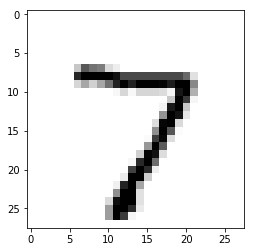

In [25]:
len(test_data_list)
all_values = test_data_list[0].split(',')
all_values[0]  # 첫번째 테스트데이터 정답 : 7

plt.imshow(np.asfarray(all_values[1:]).reshape(28,28), cmap='Greys', interpolation='None')

In [26]:
train_file = open('data/mnist/mnist_train.csv')
train_list = train_file.readlines()
train_file.close()

test_file = open('data/mnist/mnist_test.csv')
test_list = test_file.readlines()
test_file.close()

In [27]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784  # wih 78400
hidden_nodes = 100 # who 1000
output_nodes = 10  # 0~9
# 학습률 0.3
learning_rate = 0.3

# 신경망 객체 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

train_file = open('data/mnist/mnist_train.csv')
train_list = train_file.readlines()
train_file.close()

test_file = open('data/mnist/mnist_test.csv')
test_list = test_file.readlines()
test_file.close()

In [28]:
for e in range(1,10):
    epochs = e
    for time in range(epochs):
        # 신경망 학습
        for record in train_list[1:]:
            all_values = record.split(',')
            # 0.01 ~ 1 로 스케일링
            inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01

            # 결과값 생성
            targets = np.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99

            n.train(inputs, targets)
    # 신경망 테스트

    scorecard = []

    for record in test_list[1:] :
        all_values = record.split(',')

        # 정답
        correct_label = int(all_values[0])
        # print(correct_label,'correct_label')
        outputs = n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
        label = np.argmax(outputs)
        # print(label, ": my neywork's answer")
        # print('\n')
        if (label == correct_label) :
            scorecard.append(1)
        else :
            scorecard.append(0)

    scorecard_array = np.asarray(scorecard)
    print(e, 'epoch')
    print(scorecard_array.sum() / scorecard_array.size)

1 epoch
0.9459
2 epoch
0.9563
3 epoch
0.95
4 epoch
0.9421
5 epoch
0.9486
6 epoch
0.9441
7 epoch
0.9461
8 epoch
0.9432
9 epoch
0.9378


0.9469